# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv', index_col=0)
south_df = pd.read_csv('SouthCallCenter.csv', index_col=0)

In [3]:
north_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [4]:
south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [5]:
#Number of rows and columns and how many null values for each column.
print('.shape: North',north_df.shape,'South',south_df.shape)
print("\n"'NORTH')
print(north_df.isna().sum(),"\n")
print('SOUTH')
print(south_df.isna().sum())
#There are no missing values except for the Incoming Wait Time column in both sets of data.


.shape: North (245, 14) South (314, 14)

NORTH
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64 

SOUTH
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64


In [6]:
#Percentage of NaN values for Incoming Wait Time for North and South branch
incoming_wait_df = pd.concat([north_df['Incoming Wait Time'], south_df['Incoming Wait Time']], axis=1, keys=['north_df', 'south_df'])
for col in incoming_wait_df.columns:
    pct_missing = np.mean(incoming_wait_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



north_df - 74%
south_df - 60%


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [7]:
#Code Used:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [8]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [9]:
#Code Used:
north_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [10]:
#Code Used:
south_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [11]:
# Code Used:
#print('NORTH',north_df["Time Block"].unique())
#print('SOUTH',south_df['Time Block'].unique())
#north_df.groupby(['Time Block'])[["Calls"]].sum()
#south_df.groupby(['Time Block'])[["Calls"]].sum()
(north_df.groupby(['Time Block'])[["Calls"]].sum()) + (south_df.groupby(['Time Block'])[["Calls"]].sum())

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9 reps
- 1b) Reps in the South Branch = 11 reps


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.99 min
> - Not Ready Minutes = 1.91 min
> - Incoming Wait Time =  3.05 sec
> - During Call Wait Time = 2.97 min
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 min
> - Not Ready Minutes = 1.91 min
> - Incoming Wait Time =  3 sec
> - During Call Wait Time = 3.08 min
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10 calls
> - 10:00AM  = 99 calls
> - 11:00AM  = 56 calls
> - 12:00PM  = 120 calls
> - 1:00PM   = 40 calls
> - 2:00PM   = 65 calls
> - 3:00PM   = 73 calls
> - 4:00PM   = 53 calls
> - 5:00PM   = 43 calls



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There are a lot of "Incoming Wait Time" values missing for each Dataset (North and South). We can replace this with the mean, but I would want to know how this data was collected and if this time is missing because the wait time is long and the information was intenitonally left out.

In [12]:
# Code Used
#Assigns a variable to a calculated mean 
mean_value_north=north_df['Incoming Wait Time'].mean()
mean_value_south=south_df['Incoming Wait Time'].mean()
#Replaces null values with the calculated mean and updates the Dataset.
north_df['Incoming Wait Time'].fillna(value=mean_value_north, inplace=True)
south_df['Incoming Wait Time'].fillna(value=mean_value_south, inplace=True)


In [13]:
#Checking to see if there are no null values and if Dataframe is the same size as before
print('.shape: North',north_df.shape,'South',south_df.shape)
print("\n"'NORTH')
print(north_df.isna().sum(),"\n")
print('SOUTH')
print(south_df.isna().sum())

.shape: North (245, 14) South (314, 14)

NORTH
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64 

SOUTH
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: It was reading as two 'YES' because of an extra space, I got rid of the space.

In [14]:
#Code Used
north_df['Sale'] = north_df['Sale'].str.replace(" ", "")
north_df['Sale'].unique()
# Add Additional Cells as needed.


array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are duplicates in both datasets, I dropped the duplicate rows.

In [15]:
#Code Used
#Gives you a comparison to see if there are any duplicate rows.
north_df_dedupped = north_df.drop_duplicates()

print(north_df.shape)
print(north_df_dedupped.shape)
# Add Additional Cells as needed.

(245, 14)
(243, 14)


In [16]:
#view duplicate rows
north_df[north_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.00000,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,3.04878,2,1


In [17]:
south_df_dedupped = south_df.drop_duplicates()

print(south_df.shape)
print(south_df_dedupped.shape)

(314, 14)
(311, 14)


In [18]:
#view duplicate rows
south_df[south_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,3.0,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,3.0,4,1


In [355]:
#update database to not include duplicate rows:
south_df = south_df.drop_duplicates()
north_df = north_df.drop_duplicates()

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: All of the information can be useful. This is a really nice dataframe that is fairly clean with the excpetion of the missing values for "Incoming Wait Time."

In [331]:
#Code Used

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [332]:
# Create dataframe for the entire company named df
df = north_df.append(south_df)
df

/var/folders/wh/snng78rj2bq7994wy2x1xtqc0000gn/T/ipykernel_8793/3845852125.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = north_df.append(south_df)


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,3.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,3.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,3.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,3.0,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent made 37 calls and is the rep with the highest number of calls for North branch.
- South Branch = Eric made 35 calls and is the rep with the highest number of calls for South branch.


In [333]:
# Code Used
#assigned a variable for the sum of calls by Rep ID
calls_north_df = north_df.groupby(['Rep ID']).sum()

#Used that variable to make a decending list to see the top # of calls by a rep
calls_north_df.sort_values(by='Calls', ascending=False)

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,105.414634,117,37
Lilly,0,2,307,59,91.878049,88,30
Duke,2,0,292,56,84.731707,85,29
Todd,1,0,296,58,91.121951,97,29
Joe,0,0,246,48,80.780488,78,25
Cam,1,0,233,46,71.634146,66,24
Xander,1,0,244,44,74.878049,68,24
Andy,0,3,228,43,75.634146,65,23
Amanda,0,1,218,41,63.829268,58,22


In [334]:
calls_south_df = south_df.groupby(['Rep ID']).sum()
calls_south_df.sort_values(by='Calls', ascending=False)


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,0,0,361,54,98.0,112,35
Randy,3,1,312,63,95.0,96,32
Helga,0,2,292,58,96.0,95,31
Sandy,1,0,317,59,88.0,96,31
George,0,0,298,53,89.0,87,29
Karl,1,0,287,61,83.0,85,28
Kate,0,0,283,60,88.0,80,28
Josh,3,0,260,50,82.0,83,26
Susan,2,0,267,53,77.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? The company, nor the branches fall out of the optimal range for call abandonment. However, North Branch's call abandoment rate is significatntly higher. 

In [335]:
# Code Used
print('The average call abandoment rate company wide is:',df['Abandoned'].mean() * 100)
print('The average call abandoment rate for north branch is:',north_df['Abandoned'].mean() * 100)
print('The average call abandoment rate for south branch is:',south_df['Abandoned'].mean() * 100)

The average call abandoment rate company wide is: 1.9855595667870036
The average call abandoment rate for north branch is: 2.880658436213992
The average call abandoment rate for south branch is: 1.2861736334405145


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here: 
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 0% of calls were answered within 2 sec out of 245 calls.
- South Branch = 0% of calls were answered within 2 sec out of 314 calls.
- Company Wide = 0% of calls were answered within 2 sec out of 559 calls.

<span style='color:green'> **I'm unclear on whether this is measuring the amount of time a customer waits from when they dial in to when they speak to a representative (Busy Minutes + Not Ready Minutes + Incoming Wait Time) OR if it's measuring how long they wait for a representative to pick up the phone once the call has been assigned to a rep and they're ready to receive the call (Incoming Wait Time). 'Incoming Wait Time' is the only column with missing values and is missing A LOT of values with North Branch missing 74% and South Branch missing 60%. It is impossible to give an accurate count with so many missing values and not knowing why the missing values exist (intentional or unintentional omission). Different call centers measure their KPI differently, so I would also want clarification as to how this particular call center measures KPI. <br>
I went to office hours and asked a TA but their answer was ambiguous. For that reason I've listed answers to both senarios: Just 'Incoming Wait Time' AND Busy Minutes + Not Ready Minutes + Incoming Wait Time.**</span>

In [336]:
# Code Used: Looking at Busy Min,Not Ready Min and Incoming Wait Time which show how long someone had to wait for a rep to be ready to answer. 
north_less_than_two = north_df['Busy Minutes'][north_df['Busy Minutes'] <= 1].count()
south_less_than_two = south_df['Busy Minutes'][south_df['Busy Minutes'] <= 1].count()
df_less_than_two = df['Busy Minutes'][df['Busy Minutes'] <= 1].count()
print(north_less_than_two,south_less_than_two, df_less_than_two)
# If there are no calls that are equal to or less than 1 min for 'Busy Minutes', it is not possible for any call to have been answered within 2 sec.

0 0 0


**Just 'Incoming Wait Time':**
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47% of calls were answered within 2 sec out of 245 calls.
- South Branch = 15.29% of calls were answered within 2 sec out of 314 calls.
- Company Wide = 14.49% of calls were answered within 2 sec out of 559 calls.

In [337]:
#Calculated percentage of Incoming Wait Times equal to or under 2 sec. 
north_kpi = ((north_df[north_df["Incoming Wait Time"] <= 2.0].count())/245 * 100).round(2)
south_kpi = ((south_df[south_df["Incoming Wait Time"] <= 2.0].count())/314 *100).round(2)
df_kpi = ((df[df["Incoming Wait Time"] <= 2.0].count())/559 *100).round(2)
print(north_kpi['Incoming Wait Time'], south_kpi['Incoming Wait Time'], df_kpi['Incoming Wait Time'])


13.47 15.29 14.49


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 717.17 seconds or 11.95 minutes
- South Branch in seconds = 720.90 seconds or 12.01 minutes
- Company Wide in seconds = 719.26 seconds or 11.99 minutes


In [338]:
# Calculated the average time (in sec and min) it takes for a customer to reach a representative from when they call in.
north_avg_answ=(north_df['Busy Minutes'].mean()*60)+(north_df['Not Ready Minutes'].mean()*60)+(north_df['Incoming Wait Time'].mean())
north_minutes=north_avg_answ/60
south_avg_answ=(south_df['Busy Minutes'].mean()*60)+(south_df['Not Ready Minutes'].mean()*60)+(south_df['Incoming Wait Time'].mean())
south_minutes=south_avg_answ/60
avg_answ=(df['Busy Minutes'].mean()*60)+(df['Not Ready Minutes'].mean()*60)+(df['Incoming Wait Time'].mean())
minutes=avg_answ/60
print('In Seconds: ',north_avg_answ,south_avg_answ,avg_answ)
print('In Minutes: ',north_minutes,south_minutes,minutes)

In Seconds:  717.1189400782897 722.2282958199357 719.9871885180945
In Minutes:  11.951982334638162 12.037138263665595 11.999786475301574


**Just 'Incoming Wait Time':**
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds 
- South Branch in seconds = 3.0 seconds 
- Company Wide in seconds = 3.02 seconds 


In [339]:
#Calculated the average time (in sec) it takes for a reprsentative to pick up the phone once the call is assigned and they are ready to recieve the call.
north_avg_ans= north_df['Incoming Wait Time'].mean()

south_avg_ans= south_df['Incoming Wait Time'].mean()

avg_ans= df['Incoming Wait Time'].mean()

print(north_avg_ans,south_avg_ans,avg_ans)


3.0448660042155886 3.0 3.0196794928238053


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because I felt it very cleary shows which queue has the highest and lowest abandoment rates at a glance. Although I really like the treemap but it looks (at a glance) that queues 'B','C' and 'D' equal 'A' which is inaccurate. 

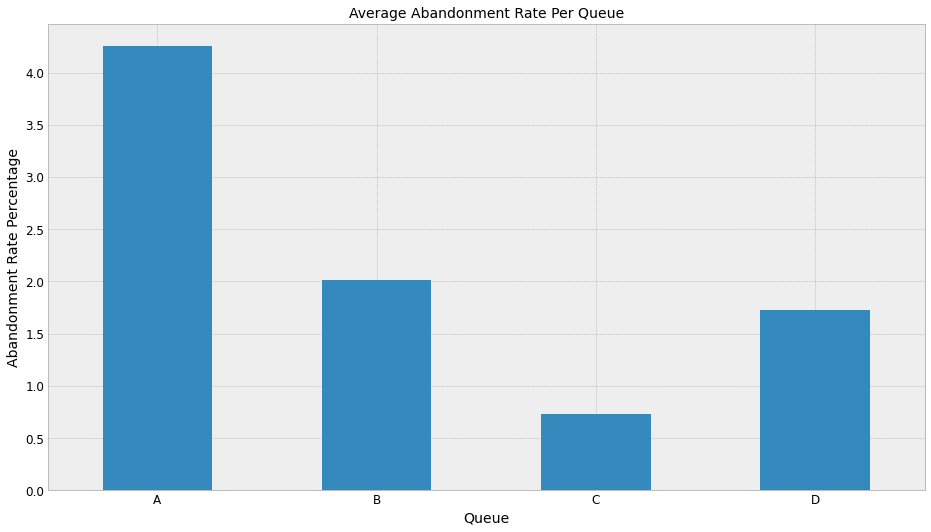

In [340]:
# Create visualization 1 here
# Import any additional libraries needed with alias
from matplotlib import style
style.use('bmh')
plt.rcParams['figure.figsize'] = (20,10)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100 


#Your Code Here: Code for bar chart
abandoment_rates_df = pd.DataFrame.from_dict(abandonment_rates, orient = 'index')



abandoment_rates_df.plot(kind = 'bar', legend = False, figsize= (14,8))
plt.title('Average Abandonment Rate Per Queue',fontsize = 14, color= 'black')
plt.yticks(rotation=0,fontsize = 12,color = 'black')
plt.xticks(rotation=0, fontsize = 12,color = 'black')
plt.xlabel('Queue',fontsize = 14, color= 'black')
plt.ylabel('Abandonment Rate Percentage',fontsize = 14, color='black')
plt.savefig('abandoment_rate.png')
plt.show()

In [341]:
abandoment_rates_df

,0
A,4.255319
B,2.013423
C,0.729927
D,1.724138


In [342]:
#Code for tree map for abandoment rates
"""import squarify
new_df = pd.DataFrame({'Abandoment rate':[4.17,2.01,0.72,1.70], 'Queue':[ "A  4.17%", "B  2.01%", "C  0.72%", "D  1.70%"] })

# plot it
squarify.plot(sizes=new_df['Abandoment rate'], 
    label=new_df['Queue'], 
    alpha=1, 
    color= {'papayawhip', 'darkturquoise', 'teal', 'salmon'}, 
    pad=True,
    text_kwargs={'color':'black','fontsize':18}
    )
plt.text(28, 100,                     
         'Average Abandonment Rate Per Queue',                   
         fontsize = 22, 
         color='black')
plt.axis('off')
plt.show()"""

'import squarify\nnew_df = pd.DataFrame({\'Abandoment rate\':[4.17,2.01,0.72,1.70], \'Queue\':[ "A  4.17%", "B  2.01%", "C  0.72%", "D  1.70%"] })\n\n# plot it\nsquarify.plot(sizes=new_df[\'Abandoment rate\'], \n    label=new_df[\'Queue\'], \n    alpha=1, \n    color= {\'papayawhip\', \'darkturquoise\', \'teal\', \'salmon\'}, \n    pad=True,\n    text_kwargs={\'color\':\'black\',\'fontsize\':18}\n    )\nplt.text(28, 100,                     \n         \'Average Abandonment Rate Per Queue\',                   \n         fontsize = 22, \n         color=\'black\')\nplt.axis(\'off\')\nplt.show()'

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a scatter plot with colored dots so you can very easily see which rep has the best stats. If your dot is in the upper left corner you're doing great! If you dot is in the bottom right corner you're not doing so good.  

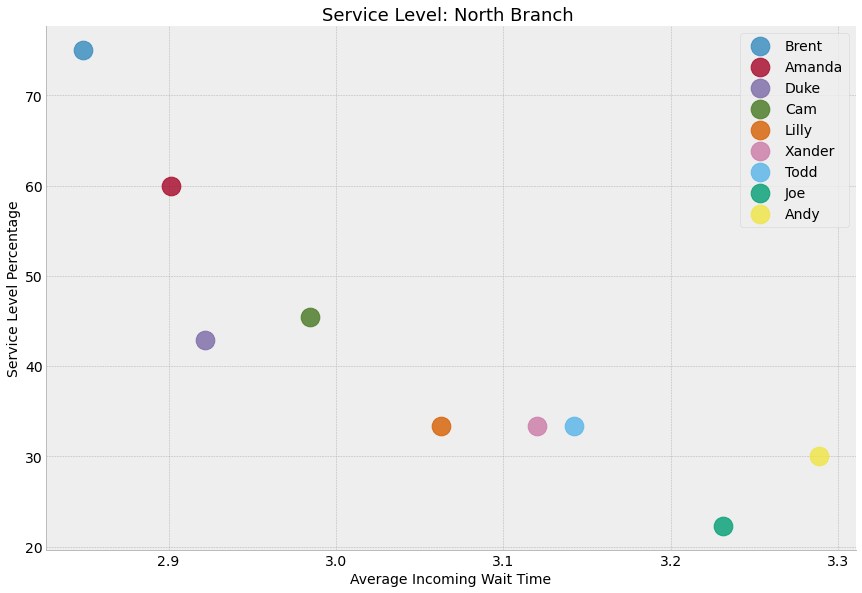

In [343]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
north_service_level= service_level.merge(north_plt, on='Rep ID', how='outer')
north_service_level= north_service_level.rename(columns={"Incoming Wait Time": "Incoming Wait Time Avg"})
north_service_level.reset_index(inplace=True)
north_service_level= north_service_level.drop(columns=['Calls_x', 'Calls_y'])
north_service_level=north_service_level.sort_values(by=['Incoming Wait Time Avg'],ascending=True)


style.use('bmh')
 
sns.lmplot( x="Incoming Wait Time Avg", y="Service Level %", data=north_service_level, 
fit_reg=False, hue='Rep ID', legend=False, height=8, aspect=1.5,scatter_kws={"s": 350})


plt.title('Service Level: North Branch ', color = 'black', fontsize= 18)
plt.xlabel('Average Incoming Wait Time',fontsize = 14, color='black')
plt.ylabel('Service Level Percentage',fontsize = 14, color='black')
plt.xticks(color = 'black', fontsize = 14)
plt.yticks(color = 'black', fontsize = 14)
plt.legend(loc='upper right', labelcolor='black',fontsize=14)

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a stacked bar chart because I could arrange the graph by call purpose (complaint, sales support and product support) stacked on top of how many calls are incoming or outgoing for each catagory. This makes it VERY easy to see (for example) that all complaints were incoming calls and that most product suport calls were outgoing.

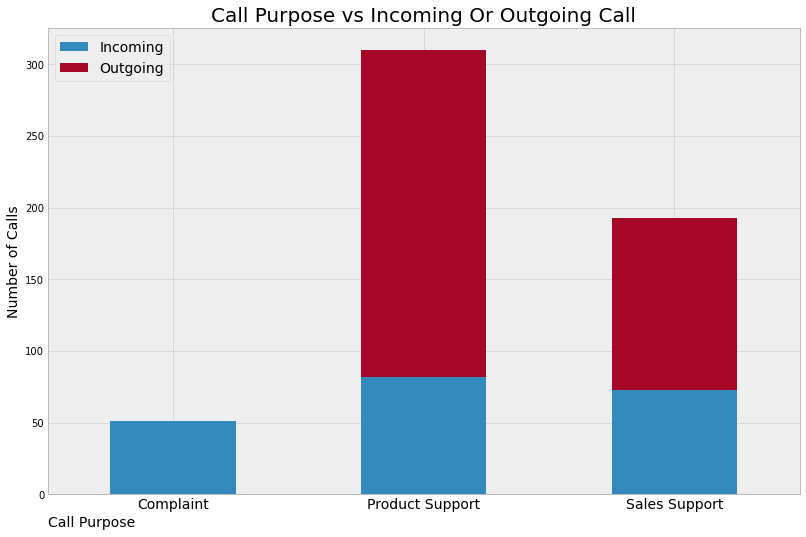

In [344]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
style.use('bmh')
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
df.groupby(["Call Purpose", "Incoming or Outgoing"]).size().unstack().plot(kind='bar', stacked= True,figsize= (12,8))

plt.title('Call Purpose vs Incoming Or Outgoing Call', color = 'black',fontsize = 20)
plt.xticks(color = 'black', rotation=0, fontsize= 14)
plt.yticks(color = 'black')
plt.xlabel('Call Purpose', color = 'black', fontsize = 14, loc='left')
plt.ylabel('Number of Calls', color = 'black', fontsize = 14)
plt.legend(loc= 'upper left', fontsize=14)
plt.savefig('stacked_bar_call.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch is operating more efficiently: their average call abandonment rate is 1.27% , while the North Branches is 2.86%.
The South Branch also had 15.29% of their calls answered within 2 seconds while the North branch has 13.47% of calls answered within 2 seconds.




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North Branch would benefit from extra help. I would reccomend sending 4 new hires to the North Branch and one to the South Branch. This would give the North Branch the extra help they need while also giving an extra boost to the South branch. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Yes: Customer service ratings to measure customer satisfaction, all of the data for Incoming Wait Time and call duration time (the amount of time a rep is on with a customer). 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose 3 stacked bar charts, each chart representing a different Call Purpose. This allows you to see (at a glance) how many incoming and outgoing calls occur in each time block for each Call Purpose.  

In [345]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
time_df = call_times.groupby(["Time Block"])


In [346]:
#Look at the data
print(time_df.first())
df.groupby(['Time Block'])[["Calls"]].sum()
df['Incoming or Outgoing'].value_counts()

               Call Purpose Incoming or Outgoing  Calls
Time Block                                             
10:00 AM      Sales Support             Incoming      1
11:00 AM      Sales Support             Incoming      1
12:00 PM    Product Support             Incoming      1
1:00 PM           Complaint             Incoming      1
2:00 PM     Product Support             Incoming      1
3:00 PM     Product Support             Incoming      1
4:00 PM       Sales Support             Incoming      1
5:00 PM     Product Support             Incoming      1
9:00 AM           Complaint             Incoming      1


Outgoing    348
Incoming    206
Name: Incoming or Outgoing, dtype: int64

In [347]:
#Verify the reasons people call in (how many values)
df["Call Purpose"].unique()

array(['Complaint', 'Sales Support', 'Product Support'], dtype=object)

In [348]:
# Use groupby and get_group to select which call purpose to plot:
purpose_df = call_times.groupby(["Call Purpose"])
complaint = purpose_df.get_group('Complaint')
sales_support = purpose_df.get_group('Sales Support')
product_support = purpose_df.get_group('Product Support')

In [349]:
#Rename 9:00 AM values to 09:00 AM so it sorts correctly and shows up in correct order when graphed.
product_support = product_support.replace('9:00 AM', '09:00 AM')
#product_support.sort_values(by=['Time Block'])

complaint = complaint.replace('9:00 AM', '09:00 AM')
#complaint.sort_values(by=['Time Block'])

#Add 09:00 AM time to Sales Support to make consistent with other graphs.
sales_support = sales_support.append({'Time Block':'09:00 AM','Call Purpose':'Sales Support','Incoming or Outgoing':'','Calls':0}, ignore_index=True)
sales_support

/var/folders/wh/snng78rj2bq7994wy2x1xtqc0000gn/T/ipykernel_8793/3867373334.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_support = sales_support.append({'Time Block':'09:00 AM','Call Purpose':'Sales Support','Incoming or Outgoing':'','Calls':0}, ignore_index=True)


,Time Block,Call Purpose,Incoming or Outgoing,Calls
0,11:00 AM,Sales Support,Incoming,1
1,11:00 AM,Sales Support,Incoming,1
2,4:00 PM,Sales Support,Incoming,1
3,10:00 AM,Sales Support,Incoming,1
4,10:00 AM,Sales Support,Incoming,1
...,...,...,...,...
189,4:00 PM,Sales Support,Outgoing,1
190,4:00 PM,Sales Support,Outgoing,1
191,5:00 PM,Sales Support,Outgoing,1
192,5:00 PM,Sales Support,Outgoing,1


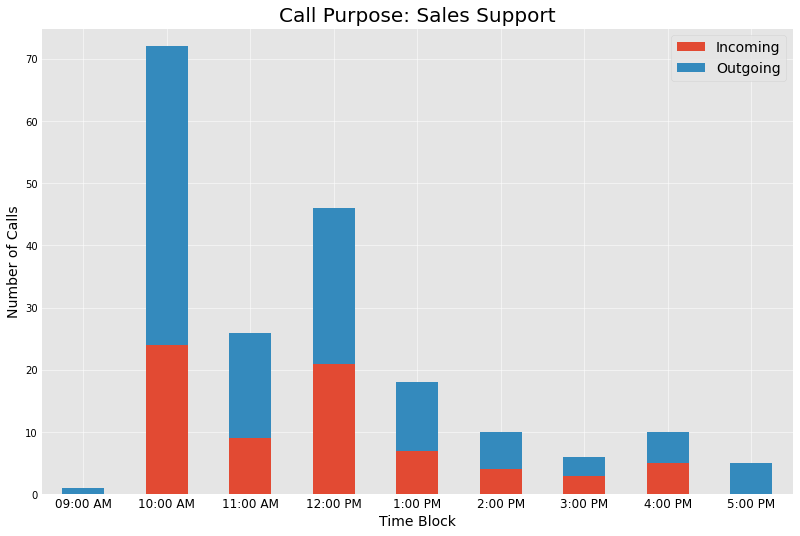

In [350]:
style.use('ggplot')

sales_support.groupby(["Time Block", "Incoming or Outgoing"])[["Calls"]].size().unstack().plot(kind='bar',color={'#348ABD','#E24A33',}, stacked= True,figsize= (12,8))
plt.ylim(0, 75)
plt.title('Call Purpose: Sales Support', color = 'black',fontsize = 20)
plt.xticks(color = 'black', rotation=0, fontsize= 12)
plt.yticks(color = 'black')
plt.xlabel('Time Block', color = 'black', fontsize = 14, loc='center')
plt.ylabel('Number of Calls', color = 'black', fontsize = 14)
plt.legend(loc= 'upper right', fontsize=14)
plt.savefig('stacked_bar_call.png')

plt.show()


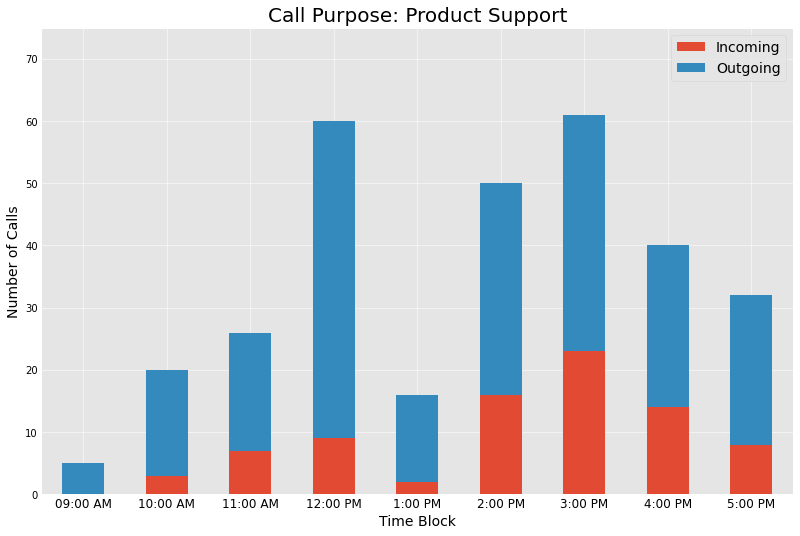

In [351]:
product_support.groupby(["Time Block", "Incoming or Outgoing"])[["Calls"]].size().unstack().plot(kind='bar', stacked= True,figsize= (12,8))
plt.ylim(0, 75)
plt.title('Call Purpose: Product Support', color = 'black',fontsize = 20)
plt.xticks(color = 'black', rotation=0, fontsize= 12)
plt.yticks(color = 'black')
plt.xlabel('Time Block', color = 'black', fontsize = 14, loc='center')
plt.ylabel('Number of Calls', color = 'black', fontsize = 14)
plt.legend(loc= 'upper right', fontsize=14)


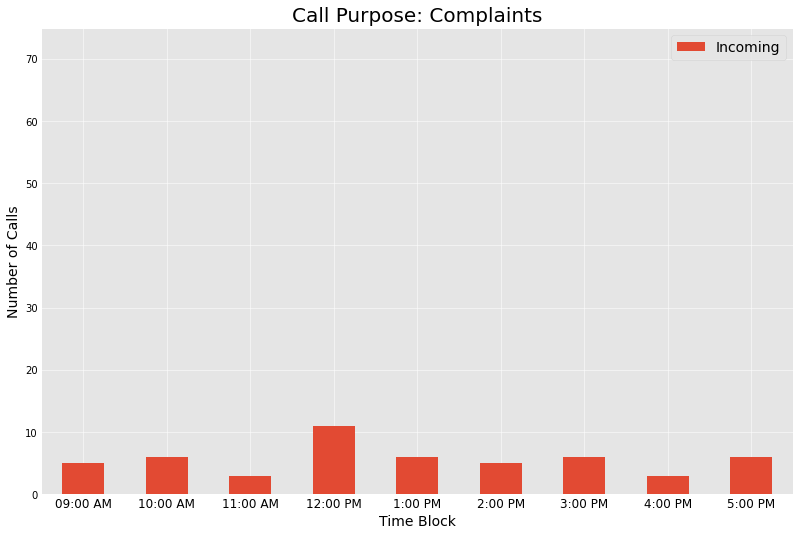

In [352]:
complaint.groupby(["Time Block", "Incoming or Outgoing"])[["Calls"]].size().unstack().plot(kind='bar', stacked= True,figsize= (12,8))
plt.ylim(0, 75)
plt.xticks(color = 'black', rotation=0, fontsize= 12)
plt.yticks(color = 'black')
plt.xlabel('Time Block', color = 'black', fontsize = 14, loc='center')
plt.ylabel('Number of Calls', color = 'black', fontsize = 14)
plt.legend(loc= 'upper right', fontsize=14)
plt.title('Call Purpose: Complaints', color = 'black',fontsize = 20)
plt.legend(loc= 'upper right', fontsize=14)